### Travel Python Notebook to Analyze Booking Data from Expedia and Airbnb Using Data from Kaggle

To Do List:
1. Load packages and data.
2. View data structure, summary statistics and plots.
3. Clean data, select and transform features.
4. Subset training data and fit models.
5. Check error rate on validation data and tune models.
6. Check model performance on test data.

Big Picture:
1. First perform a basic broad analysis.
2. Then improve by adding and trying new or more advanced techniques from books or other resources.

In [182]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [183]:
# Read Data
age_gender = pd.read_csv('./airbnb-recruiting-new-user-bookings/age_gender_bkts.csv')
countries = pd.read_csv('./airbnb-recruiting-new-user-bookings/countries.csv')
#sessions = pd.read_csv('./airbnb-recruiting-new-user-bookings/sessions.csv')
train_users = pd.read_csv('./airbnb-recruiting-new-user-bookings/train_users_2.csv')
test_users = pd.read_csv('./airbnb-recruiting-new-user-bookings/test_users.csv')

In [184]:
# Check User Summary Statistics Data Size and Structure
print(age_gender.shape)

# Check Year
print(age_gender['year'].unique())

# Check Duplicates
print(any(age_gender.duplicated()))
age_gender.head(10)

(420, 5)
[2015.]
False


,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


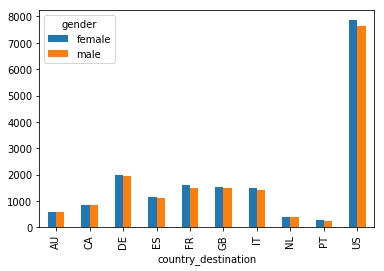

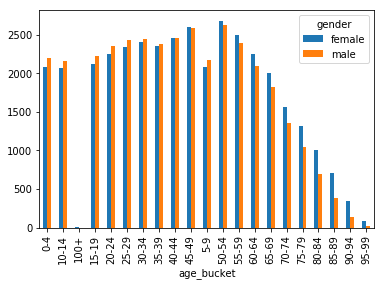

In [185]:
# Slicing by Gender
age_male = age_gender[age_gender.gender=='male']
age_female = age_gender[age_gender.gender=='female']

# Plot Data
#p1 = plt.bar(age_male['country_destination'], age_male['population_in_thousands'], facecolor='green')
#p2 = plt.bar(age_female['country_destination'], age_female['population_in_thousands'], facecolor='purple')
#plt.xlabel('Destination')
#plt.ylabel('Population')
#plt.title('Population in Each Destination by Gender')
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))
#plt.show()

age_gender.groupby(['country_destination', 'gender'])['population_in_thousands'].mean().unstack().plot.bar()
age_gender.groupby(['age_bucket', 'gender'])['population_in_thousands'].mean().unstack().plot.bar()

In [186]:
# Check Country Summary Statistics Data
print(countries.shape)
print(any(countries.duplicated()))
countries

(10, 7)
False


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


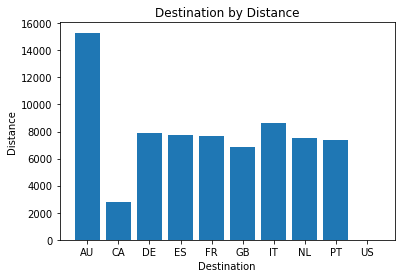

In [187]:
# Plot Destinations by Distance
p1 = plt.bar(countries['country_destination'], countries['distance_km'])
plt.xlabel('Destination')
plt.ylabel('Distance')
plt.title('Destination by Distance')
plt.show()

In [188]:
# Merge Tables Based on Destination (not sure if this is helpful)
pd.merge(age_gender, countries, on="country_destination").head(10)

,age_bucket,country_destination,gender,population_in_thousands,year,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,100+,AU,male,1.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
1,95-99,AU,male,9.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
2,90-94,AU,male,47.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
3,85-89,AU,male,118.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
4,80-84,AU,male,199.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
5,75-79,AU,male,298.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
6,70-74,AU,male,415.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
7,65-69,AU,male,574.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
8,60-64,AU,male,636.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
9,55-59,AU,male,714.0,2015.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0


In [189]:
# Check Out Training Data
print(train_users.shape)
train_users.info()
train_users.describe()
print(train_users.columns)
print(any(train_users.duplicated()))
#train_users.head(3)

(213451, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB
Index(['id', '

In [190]:
# Number of Unique Languages
len(train_users['language'].unique().tolist())

25

In [191]:
# Check for NA's and Outliers to Drop then Display Age Range
print(train_users['age'].isnull().values.any())
print(train_users['age'].isnull().sum())
train_noNA = train_users.dropna()[train_users.age<100]
print(min(train_noNA['age']), " to ", max(train_noNA['age']))
print(train_noNA.describe())

True
87990
2.0  to  99.0
       timestamp_first_active           age   signup_flow
count            6.684600e+04  66846.000000  66846.000000
mean             2.013033e+13     36.116477      2.445876
std              9.446380e+09     11.171520      6.542943
min              2.009061e+13      2.000000      0.000000
25%              2.012112e+13     28.000000      0.000000
50%              2.013082e+13     33.000000      0.000000
75%              2.014023e+13     41.000000      0.000000
max              2.014063e+13     99.000000     25.000000


C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [192]:
# Unique Categories of Selected Features in Training Data
print("gender:", train_noNA['gender'].unique())
print("signup_method:", train_noNA['signup_method'].unique())
print("affiliate_channel:", train_noNA['affiliate_channel'].unique())
print("affiliate_provider:", train_noNA['affiliate_provider'].unique())
print("first_affiliate_tracked:", train_noNA['first_affiliate_tracked'].unique())
print("signup_app:", train_noNA['signup_app'].unique())
print("first_device_type:", train_noNA['first_device_type'].unique())
print("first_browser:", train_noNA['first_browser'].unique())
print("country_destination:", train_noNA['country_destination'].unique())

gender: ['FEMALE' '-unknown-' 'MALE' 'OTHER']
signup_method: ['basic' 'facebook' 'google']
affiliate_channel: ['direct' 'other' 'seo' 'sem-non-brand' 'content' 'sem-brand'
 'remarketing' 'api']
affiliate_provider: ['direct' 'craigslist' 'google' 'other' 'facebook' 'vast' 'bing'
 'facebook-open-graph' 'email-marketing' 'meetup' 'yahoo' 'padmapper'
 'gsp' 'naver' 'baidu' 'yandex']
first_affiliate_tracked: ['untracked' 'omg' 'linked' 'tracked-other' 'product' 'marketing'
 'local ops']
signup_app: ['Web' 'Moweb' 'iOS' 'Android']
first_device_type: ['Windows Desktop' 'Mac Desktop' 'iPhone' 'Desktop (Other)'
 'Android Tablet' 'iPad' 'Android Phone' 'Other/Unknown'
 'SmartPhone (Other)']
first_browser: ['IE' 'Firefox' 'Chrome' 'Safari' '-unknown-' 'Mobile Safari' 'RockMelt'
 'Chromium' 'Android Browser' 'Chrome Mobile' 'AOL Explorer' 'TenFourFox'
 'Opera' 'Apple Mail' 'Silk' 'Camino' 'BlackBerry Browser' 'SeaMonkey'
 'Mobile Firefox' 'IE Mobile' 'Kindle Browser' 'CoolNovo' 'Maxthon'
 'Sogou E

In [193]:
# Check Out Test Data (No Destination Given)
print(test_users.shape)
print(any(test_users.duplicated()))
#test_users.head(10)

# Drop Column of All NA's (the column actually does not exist in training dataset)
test_users1 = test_users.drop(["date_first_booking"], axis=1)

print(test_users1['age'].isnull().values.any())
print(test_users1['age'].isnull().sum())
test_noNA = test_users1.dropna()[test_users.age<100]
print(min(test_noNA['age']), " to ", max(test_noNA['age']))
print(test_noNA.describe())

(62096, 15)
False
True
28876
1.0  to  99.0
       timestamp_first_active           age   signup_flow
count            3.285800e+04  32858.000000  32858.000000
mean             2.014081e+13     34.157131      6.883955
std              8.052420e+07     11.341119     10.972285
min              2.014070e+13      1.000000      0.000000
25%              2.014072e+13     26.000000      0.000000
50%              2.014081e+13     31.000000      0.000000
75%              2.014091e+13     39.000000     23.000000
max              2.014093e+13     99.000000     25.000000


C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [201]:
# Unique Categories of Selected Features in Test Data (test data contains more features than training data)
print("gender:", test_noNA['gender'].unique())
print("signup_method:", test_noNA['signup_method'].unique())
print("affiliate_channel:", test_noNA['affiliate_channel'].unique())
print("affiliate_provider:", test_noNA['affiliate_provider'].unique())
print("first_affiliate_tracked:", test_noNA['first_affiliate_tracked'].unique())
print("signup_app:", test_noNA['signup_app'].unique())
print("first_device_type:", test_noNA['first_device_type'].unique())
print("first_browser:", test_noNA['first_browser'].unique())

gender: ['FEMALE' 'MALE' '-unknown-' 'OTHER']
signup_method: ['facebook' 'basic' 'google' 'weibo']
affiliate_channel: ['direct' 'sem-brand' 'seo' 'sem-non-brand' 'remarketing' 'other'
 'content']
affiliate_provider: ['direct' 'google' 'facebook' 'bing' 'other' 'craigslist' 'padmapper'
 'email-marketing' 'yahoo' 'baidu' 'facebook-open-graph' 'naver' 'daum'
 'yandex' 'meetup']
first_affiliate_tracked: ['untracked' 'omg' 'linked' 'product' 'marketing' 'tracked-other'
 'local ops']
signup_app: ['Moweb' 'Web' 'iOS' 'Android']
first_device_type: ['iPhone' 'Windows Desktop' 'Mac Desktop' 'Android Tablet' 'Android Phone'
 'iPad' 'Desktop (Other)' 'Other/Unknown' 'SmartPhone (Other)']
first_browser: ['Mobile Safari' 'Chrome' '-unknown-' 'Safari' 'IE' 'Firefox'
 'Chrome Mobile' 'Android Browser' 'Opera' 'Silk' 'Mobile Firefox'
 'BlackBerry Browser' 'AOL Explorer' 'Chromium' 'Apple Mail' 'Maxthon'
 'IBrowse' 'Opera Mobile' 'IE Mobile' 'Sogou Explorer' 'Yandex.Browser'
 'Iron' 'SiteKiosk' 'Pale Mo

In [208]:
# Check if Training and Testing Features Match
print("gender:", train_noNA['gender'].unique() in test_noNA['gender'].unique())
print("signup_method:", train_noNA['signup_method'].unique() in test_noNA['signup_method'].unique())
print("affiliate_channel:", train_noNA['affiliate_channel'].unique() in test_noNA['affiliate_channel'].unique())
print("affiliate_provider:", train_noNA['affiliate_provider'].unique() in test_noNA['affiliate_provider'].unique())
print("first_affiliate_tracked:", train_noNA['first_affiliate_tracked'].unique() in test_noNA['first_affiliate_tracked'].unique())
print("signup_app:", train_noNA['signup_app'].unique() in test_noNA['signup_app'].unique())
print("first_device_type:", train_noNA['first_device_type'].unique() in test_noNA['first_device_type'].unique())
print("first_browser:", train_noNA['first_browser'].unique() in test_noNA['first_browser'].unique())

gender: True
signup_method: False
affiliate_channel: False
affiliate_provider: False
first_affiliate_tracked: True
signup_app: True
first_device_type: True
first_browser: False


C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.
C:\Users\yongy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


In [194]:
# Create a Randomly Selected Smaller Subset of the Data to Work with Since the Original Data is Too Large for My Computer
np.random.seed(12345)
train_noNA_part = train_noNA.iloc[np.random.choice(len(train_noNA), size=50000, replace=True),:]

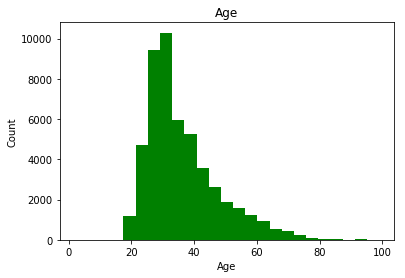

In [195]:
# Plot Data
plt.hist(train_noNA_part['age'], 25, facecolor='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age')
plt.show()

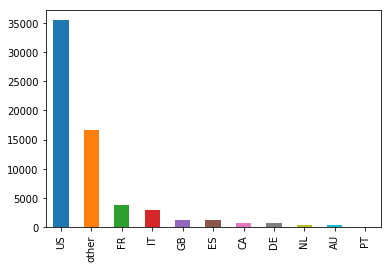

In [196]:
# Count Frequency
train_noNA_part.groupby('first_device_type').count()
train_noNA_part['first_device_type'].value_counts().plot(kind='bar')
train_noNA_part['country_destination'].value_counts().plot(kind='bar')

Notes for next time: fit models. Where will a new guest book their first travel experience?

In [254]:
# Fit Linear Regression (create validation set within training set)
model = LinearRegression(fit_intercept=True)
X = train_noNA_part[['first_affiliate_tracked', 'signup_app', 'first_device_type']]
Y = train_noNA_part['country_destination']

# Transform into Dummy Variables of 0 or 1 (stacked)
X = pd.get_dummies(data = X, drop_first = True)
Y = pd.get_dummies(data = Y, drop_first = True)
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = .20, random_state = 10)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_valid) # has negative values, should use logistic regression for categorical response having 0 or 1
Y_pred = (Y_pred > 0.5) # wrong
accuracy_score(Y_valid, Y_pred)

0.7036

In [252]:
# Fit Logistic Regression (can only fit when response variable is 1-D)
destination_name = 'US'
model = LogisticRegression(fit_intercept=True, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, Y_train[destination_name])
Y_pred = model.predict(X_valid) # has negative values, should use logistic regression
Y_pred = (Y_pred > 0.5)
accuracy_score(Y_valid[destination_name], Y_pred)

0.7036

In [255]:
# Test Model on Test Dataset
X_test = test_noNA[['first_affiliate_tracked', 'signup_app', 'first_device_type']]
X_test = pd.get_dummies(data = X_test, drop_first = True)
Y_test = model.predict(X_test)
#Y_test = (Y_test > 0.5)
pd.DataFrame(Y_test)

,0,1,2,3,4,5,6,7,8,9
0,0.011457,0.006622,0.015446,0.022331,0.011492,0.020502,0.009064,-0.000502,0.824785,0.073675
1,0.015798,0.012493,0.022277,0.056242,0.028896,0.035353,0.009522,0.003604,0.691158,0.118291
2,0.008106,0.008598,0.028752,0.040431,0.018562,0.021229,0.007835,-0.000350,0.748637,0.109272
3,0.008106,0.008598,0.028752,0.040431,0.018562,0.021229,0.007835,-0.000350,0.748637,0.109272
4,0.014370,0.013938,0.023535,0.059360,0.026095,0.025531,0.007752,0.001663,0.721837,0.100297
5,0.015021,0.012252,0.023860,0.049080,0.022434,0.024154,0.006186,0.002372,0.727924,0.112171
6,0.015021,0.012252,0.023860,0.049080,0.022434,0.024154,0.006186,0.002372,0.727924,0.112171
7,0.032146,0.005862,0.020668,0.059307,0.009201,0.027830,0.025105,0.000896,0.701008,0.116991
8,0.015021,0.012252,0.023860,0.049080,0.022434,0.024154,0.006186,0.002372,0.727924,0.112171
9,0.014370,0.013938,0.023535,0.059360,0.026095,0.025531,0.007752,0.001663,0.721837,0.100297
